# Chapter 05 오차역전파법

## 6.1 매개변수 갱신

신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다. 즉 매개변수의 최적값을 찾는 문제이며 이러한 문제를 푸는 것을 **최적화**(optimization)이라 한다.

### 6.1.1 모험가 이야기

모험가는 주위 경치는 볼 수 없지만 지금 서 있는 땅의 기울기는 알 수 있다. 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가자는 것이 SGD의 전략이다.

### 6.1.2 확률적 경사 하강법(SGD)

W <- W - $\eta\frac{\partial{L}}{\partial{W}}$

In [2]:
from IPython.display import Image
import numpy as np

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

초기화 때 받는 인수인 lr은 learning rate(학습률)을 뜻한다. 이 학습률은 인스턴스 변수로 유지한다. update(parrams, grads) 메서드는 SGD 과정에서 반복해서 불린다. params['W1'], grads['W1'] 둘 모두 각각 가중치 매개변수와 기울기를 저장하고 있다.

network = TowLayernet(...)<br>
**optimizer = SGD() **<br>

for i in range(10000):<br>
&nbsp;&nbsp;&nbsp;&nbsp;...<br>
&nbsp;&nbsp;&nbsp;&nbsp;x_batch, t_batch = get_mini_batch(...) #미니배치 <br>
&nbsp;&nbsp;&nbsp;&nbsp;grads = network.gradient(x_batch, t_batch)<br>
&nbsp;&nbsp;&nbsp;&nbsp;params = network.params<br>
&nbsp;&nbsp;&nbsp;&nbsp;**optimizer.update(params, grads)**<br>
&nbsp;&nbsp;&nbsp;&nbsp;...


optimizer는 '최적화를 행하는 자' 라는 뜻의 단어이다. 이 코드에서는 SGD가 그 역할을 한다. 매개변수 갱신은 optimizer가 책임지고 수행하니, optimizer에 매개변수와 기울기 정보만 넘겨주면 된다.

최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다. 가령 모멘텀이라는 최적화 기법 역시 update(params, grads)라는 메서드를 갖도록 구현하면 optimizer = SGD()에서 optimizer = Momentum()으로 변경하는 것만으로 최적화 기법이 바뀐다.

### 6.1.3 SGD 단점

SGD는 단순하고 구현도 쉽지만 비효율적일 때가 있다. SGD의 단점은 비등방성 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적 이라는 것이다. 이럴 때는 SGD와 같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다는 다른 방식을 고려해볼 수 있다. 모멘텀, AdaGrad, Adam 과 같은 방법을 고려해 볼 수 있다.

### 6.1.4 모멘텀

**모멘텀**(Momentum)은 운동량을 뜻하는 단어로, 물리와 관계가 있다. 모멘텀 기법은 수식으로는 다음과 같이 쓸 수 있다.

<center>**V <- ** $\alpha$**v** - $\eta\frac{\partial{L}}{\partial{W}}$ [식 6.3]
<center> **W <- W ** + v [식 6.4]

SGD처럼 여기에서도 W는 갱신할 가중치 매개변수, $\frac{\partial{L}}{\partial{W}}$는 **W**에 대한 손실함수의 기울기, $\eta$는 학습률이다. v라는 변수가 새로 나오는데, 이는 물리에서 말하는 속도에 해당한다. 식 [6.3]은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타낸다. 모멘텀은 [그림 6-4]와 같이 공이 그릇의 바닥을 구르는 듯한 움직임을 보여준다.

[식 6.3]의 $\alpha$**v**항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다. 물리에서의 지면 마찰이나 공기 저항에 해당한다. 

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
    
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

인스턴스 변수 v가 물체의 속도이다. v는 초기화 때는 아무 값도 담지 않고, 대신 update()가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장한다. 나머지 부분은 [식 6.3]과 [식 6.4]를 간단히 코드구조로 옮긴 것

모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직인다. SGD와 비교해서 지그재그의 정도가 덜하다.

### 6.1.5 AdaGrad

신경망 학습에서는 학습률(수식에서는 $\eta$로 표기) 값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 크게 발산하여 학습이 제대로 이루어지지 않는다.
AdaGr
학습률을 정하는 효과적 기술로 **학습률 감소**가 있는데, 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습하는 이야기이며, 실제로 신경망 학습에 자주 쓰인다.

AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행한다. AdaGrad의 갱신 방법은 수식적으로 다음과 같다.

<center>**h** $\leftarrow$ **h** + $\frac{\partial{L}}{\partial{W}} \bigodot \frac{\partial{L}}{\partial{W}}$ [식 6.5]
<center>**W** $\leftarrow$ **W** - $\eta$$\frac{1}{\sqrt{h}}$$\frac{\partial{L}}{\partial{W}}$ [식 6.6]

마찬가지로 **W**는 갱신할 가중치 매개변수, $\frac{\partial{L}}{\partial{W}}$은 W에 대한 손실 함수의 기울기, $\eta$는 학습률을 뜻한다. 여기에 새로 h라는 변수가 등장한다. h는 [식 6.5]에서 보듯 기존 기울기 값을 제곱하여 계속 더해준다. $\bigodot$은 행렬의 원소별 곱셈을 의미한다.

그리고 매개변수를 갱신할 때 $\frac{1}{\sqrt{h}}$ 을 곱해 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인(크게 갱신된)원소는 학습률이 낮아진다는 뜻인데, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다.

**NOTE** \_AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다. 그래서 학습을 진행할수록 갱신 강도가 약해진다. 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 된다. 이 문제를 개선한 기법으로서 RMSProp방법이 있다. RMSProp은 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다. 이룰 **지수이동평균**(Exponential Moving Average, EMA)이라 하여, 과거 기울기의 반영 규모를 기하급수적으로 감소시킨다.

AdaGrad의 구현은 다음과 같다.

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

마지막 줄에서 1e-7값을 더하여 0으로 나누느 사태를 막아준다. 대부분의 딥러닝 프레임워크에선느 이 값도 인수로 설정할 수 있다.

최솟값을 향해 효율적으로 움직인다. y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

### 6.1.6 Adam

모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 그럼 혹시 이 두 기법을 융합하면 어떻게 될까? 이 생각에서 출발한 기법이 Adam이다.

직관적으로는 모멘텀과 AdaGrad를 융합한 듯한 방법이다. 이 두 방법의 이점을 조합했다면 매개변수 공간을 효율적으로 탐색해줄 것으로 기대할 수 있다.

### 6.1.7 어느 갱신 방법을 이용할 것인가?

각자의 장단이 있다. 많은 사람들이 Adam을 만족해하며 쓰는 것 같다. 이 책에서는 주로 SGD와 Adam을 사용한다.

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

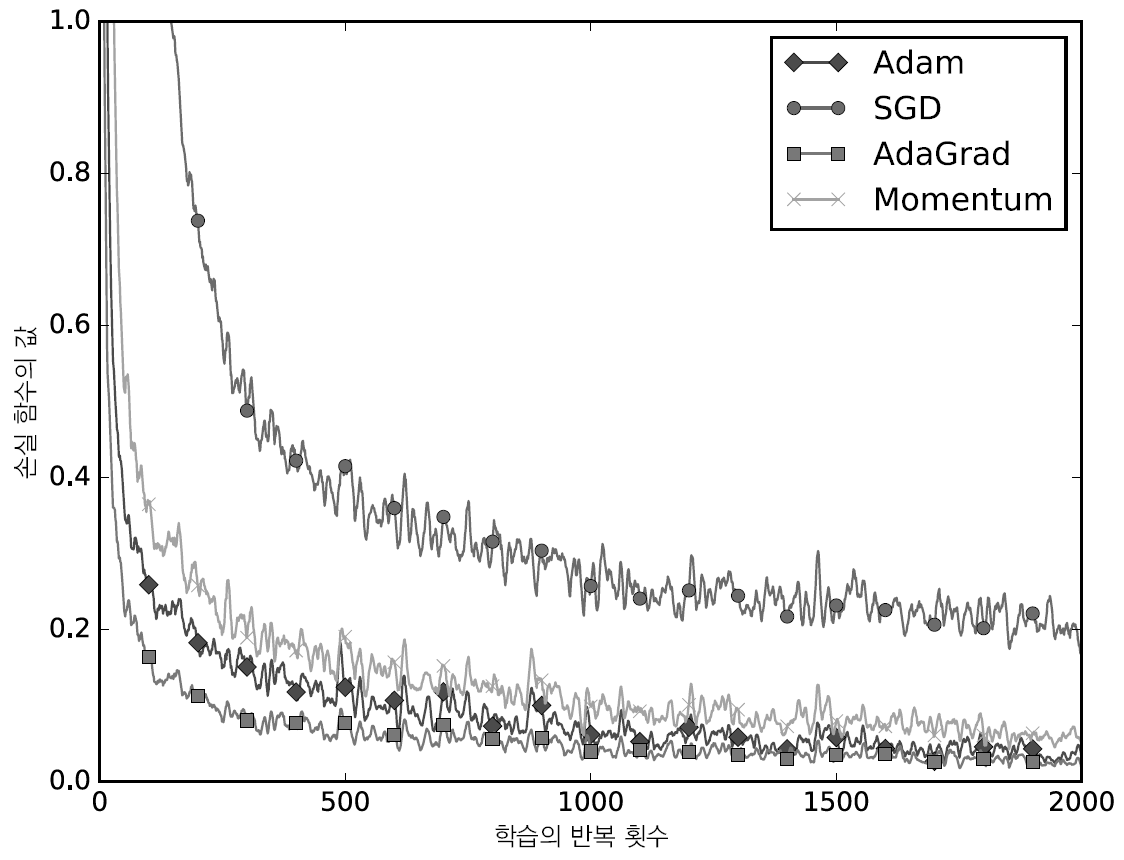

In [12]:
Image("./deep_learning_images/fig 6-9.png", width=500, height=500)

일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고 최종 정확도도 높게 나타난다.

## 6.2 가중치의 초깃값

신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다. 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성폐를 가르는 일이 종종 있다.

### 6.2.1 초깃값을 0으로 하면?

**가중치 감소**(weight decay)기법은 간단히 말하자면 가중치 매개변수의 값이 작아지도록 학습하는 방법이다. 이는 오버피팅을 억제해 범용 성능을 높인다.

가중치를 작게 만들고 싶으면 초깃값도 작은 값에서 시작하는것이 정공법이다. 그 때문에 가중치의 초깃값은 0.01 * np.random.randn(10, 100)처럼 정규분포에서 생성되는 값을 0.01배한 작은 값을 사용했다.

In [28]:
np.shape(np.random.randn(10, 100))

(10, 100)

하지만 가중치의 초깃값을 모두 0으로 설정하면 문제가 생긴다. (정확히는 가중치를 균일한 값으로 생성하면 안 된다.) 가중치가 모두 똑같이 갱신되기 때문이다.

### 6.2.2 은닉층의 활성화값 분포

가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 간단한 실험을 해 보자. 활성화함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려 보자.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100                 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5          # 은닉층이 5개
activations = {}               # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

층이 5개이고, 각 층의 뉴런은 100개씩이다. 입력 데이터로서 1000개의 데이터를 정규분포로 무작위로 생성하여 이 5층 신경망에 흘린다. 활성화 함수로는 시그모이드 함수를 이용했고, 각 층의 활성화 결과를 activatinons 변수에 저장한다. 이 코드에서는 가중치의 분포에 주의해야 한다.

이 코드에서 가중치의 분포를 보면, 표준편차가 1인 정규분포를 이용하였다. 이 분포된 정도(표준 편차)를 바꿔가며 활성화값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적이다.

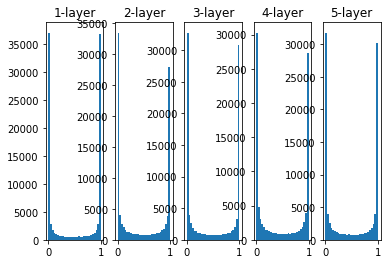

In [38]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다. 여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지자(또는 1에 가가워지자) 그 미분은 0에 다가간다. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다. 이것이 **기울기 소실**gradient vanishing 이다. 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

이번에는 가중치의 표준편차를 0.01로 바꿔 같은 실험을 반복해보겠다.

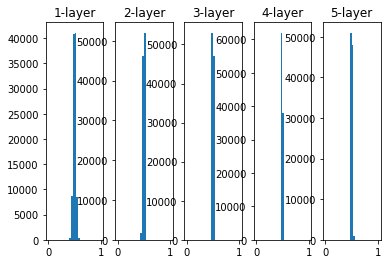

In [44]:
x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100                 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5          # 은닉층이 5개
activations = {}               # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    # w = np.random.randn(node_num, node_num) * 1    
    w = np.random.randn(node_num, node_num) * 0.01
    
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1)) # 구간을 30개로
plt.show()

이번에는 0.5 부근에 집중되어있따. 앞처럼 0과 1로 치우치진 않아서 기울기 소실 문제는 없다. 하지만 활성화값들이 치우쳤다는 것은 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없다는 뜻이다. 가령 뉴런 100개가 거의 같을 값을 출력한다면 뉴런 1개짜리와 별반 다를바가 없다는 것이다. 그래서 활성화값들이 치우치면 **표현력을 제한** 한다는 관점에서 문제가 된다.

** WARNING ** 각 층의 활성화값은 적당히 고루 분포되어야 한다. 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄지기 때문이다. 반대로 치우친 데이터가 흐르면 기울기 소실이나 표현력 제한 문제에 빠져서 학습이 잘 이뤄지지 않는 경우가 생긴다.

이 때문에 **Xavier 초깃값**을 사용해야 한다. Xavier는 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했다. 그리고 앞 계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt{n}}$ 인 분포를 사용하면 된다는 결론에 이르렀다.

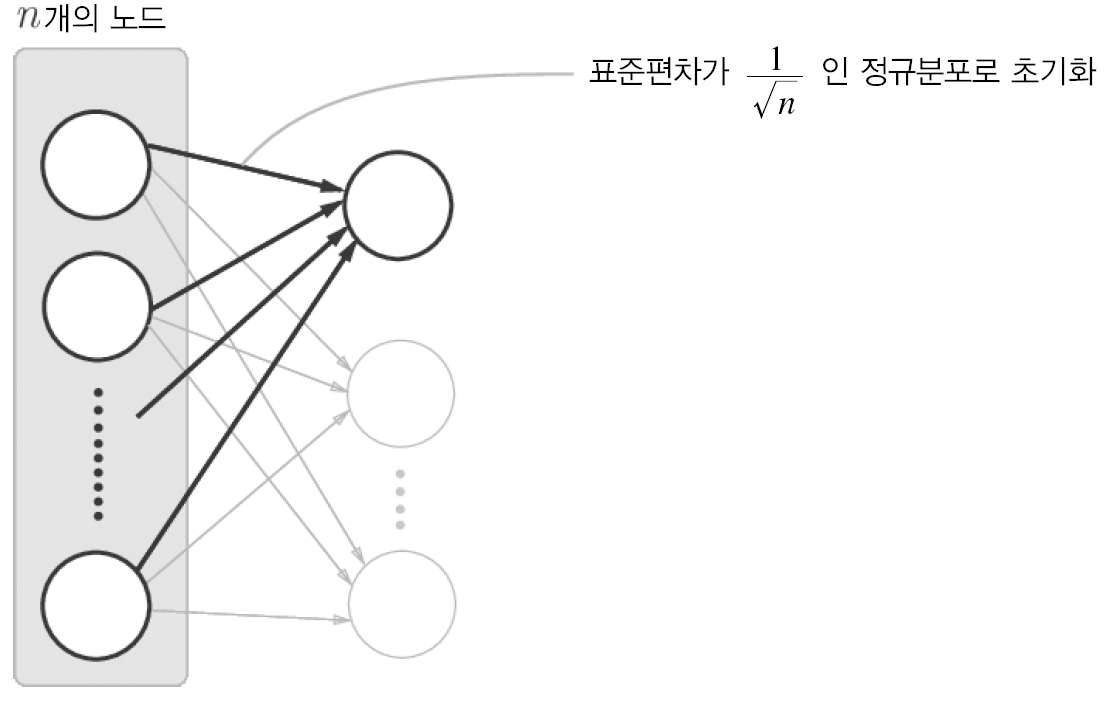

In [43]:
Image("./deep_learning_images/fig 6-12.png", width=500, height=500)

Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.

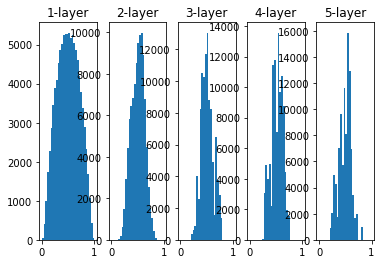

In [49]:
x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100                 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5          # 은닉층이 5개
activations = {}               # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    # w = np.random.randn(node_num, node_num) * 1    
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1)) # 구간을 30개로
plt.show()

각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대할 수 있다.

** NOTE ** 위 그림은 오른쪽으로 갈수록 약간씩 일그러지고 있다. 이 일그러짐은 sigmoid함수 대신 tanh 함수(쌍곡선 함수)를 이용하면 개선된다. 실제로 tanh 함수를 이용하면 말끔한 종 모양으로 분포된다. tanh함수도 sigmoid 함수와 같은 'S'자 모양 곡선 함수이지만, tanh 함수가 원점(0, 0)에서 대칭인 S 곡선인 반면, sigmoid 함수는 (x, y) = (0.05)에서 대칭인 S곡선이다. 활성화 함수용으로는 워점에서 대칭인 함수가 바람직하다.

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

sigmoid함수와 tanh함수는 좌우 대칭이라 중앙 부근이 선형인 함수이다. 그래서 Xavier 초깃값이 적당하다. 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하는것이 낫다.

카이밍 히(Kaiming He)의 이름을 따 **He 초깃값** 이라 한다. He 초깃값은 앞 계층의 노드가 n개일때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용한다. Xavier 초깃값에 비해 ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다가 해석할 수 있다.

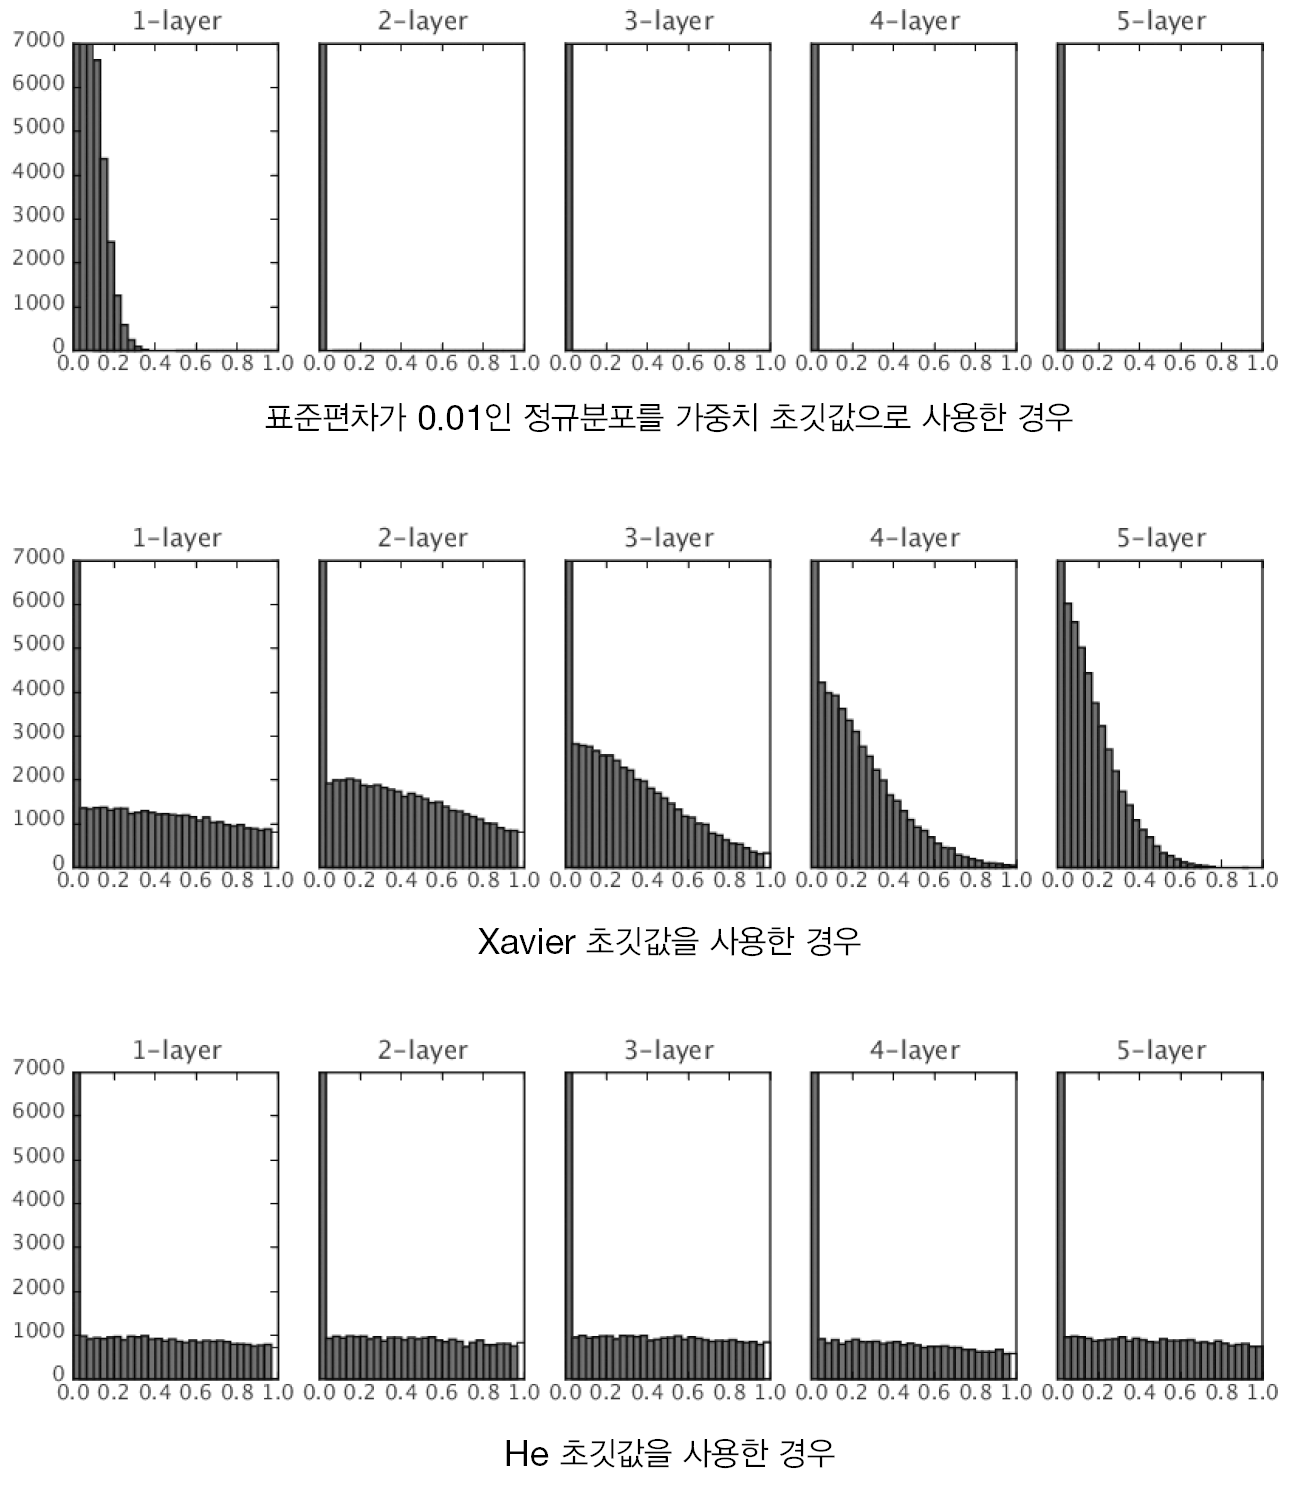

In [51]:
Image("./deep_learning_images/fig 6-14.png", width=600, height=600)

std=0.01일때 각 층의 활성화값들은 아주 작은 값들이다. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻이다. 이는 중대한 문제이며, 실제로도 학습이 거의 이뤄지지 않을 가능성이 높다.

활성화 함수로 ReLU를 사용할 때는 He 초깃값을, sigmoid나 tanh 등의 S자 모양 곡선일 때는 Xavier 초깃값을 쓰는 것이 모범 사례이다.

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

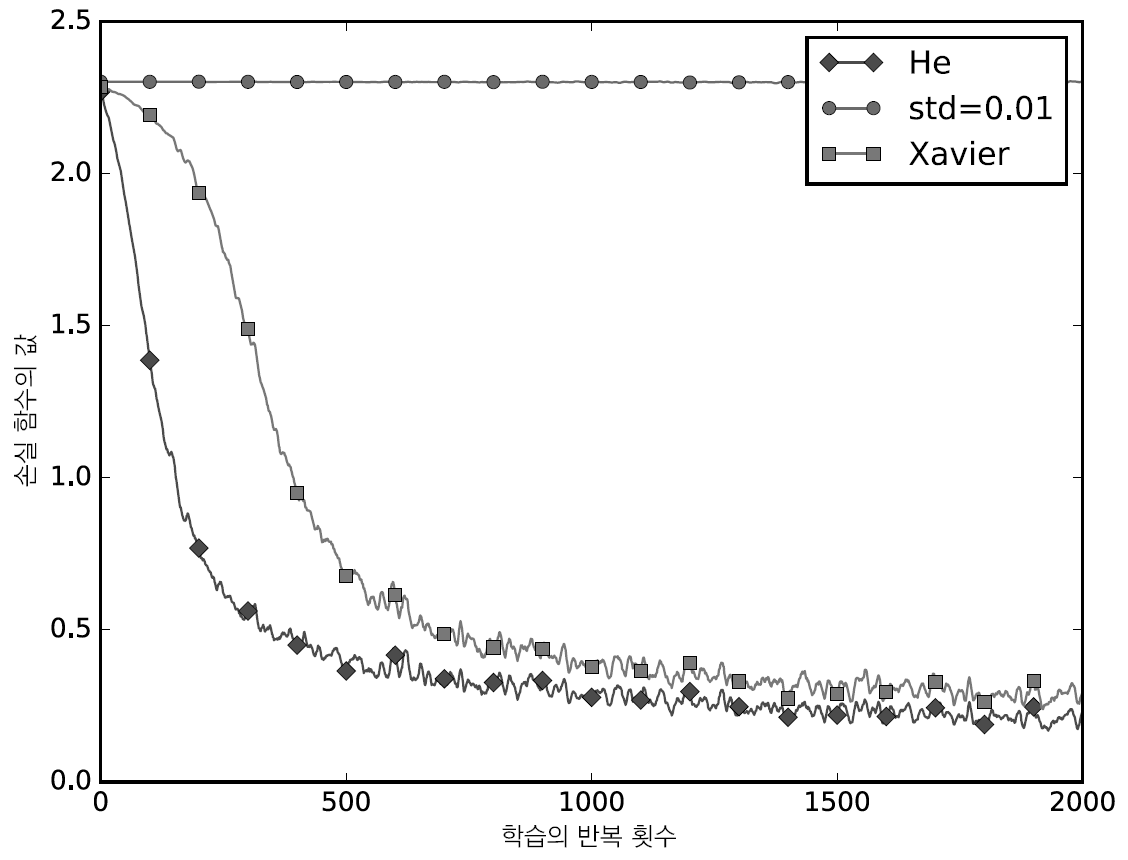

In [52]:
Image("./deep_learning_images/fig 6-15.png", width=600, height=600)

## 6.3 배치 정규화

앞 절에서는 각 층의 활성화값 분포를 관찰해보며, 가중치의 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨을 배웠다. 이토록 각 층이 활성화를 적당히 퍼뜨리도록 '강제'하는 방법이 있는데 이를 **배치 정규화**(Batch Normalization)이라 한다.

### 6.3.1 배치 정규화 알고리즘

- 학습을 빨리 진행할 수 있다.(학습 속도 개선)
- 초깃값에 크게 의존하지 않는다.(초기값 선택에 크게 구애받지 않는다.)
- 오버피팅을 억제한다.(드롭아웃 등의 필요성 감소)

배치 정규화의 기본 아이디어는 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것이다. 그래서 배치 정규화 계층을 신경망에 삽입한다.

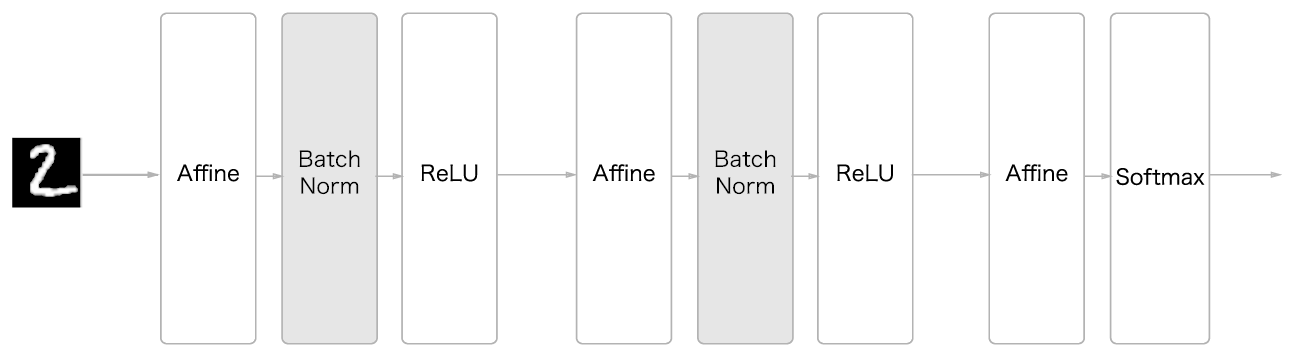

In [3]:
Image("./deep_learning_images/fig 6-16.png", width=600, height=600)

배치 정규화는 그 이름과 같이 학습 시 미니배치를 단위로 정규화한다. 구체적으로는 데이터 분포가 0, 분산이 1이 되도록 정규화한다.

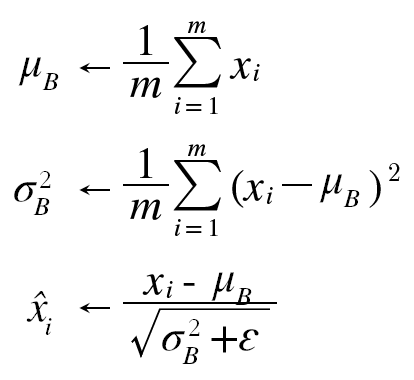

In [7]:
Image("./deep_learning_images/e 6.7.png", width=200, height=50)

미니배치 입력 데이터 {$x_1$, $x_2$, $x_3$, ..., , $x_m$}를 평균 0, 분산 1인 데이터 {$\hat{x}_1$, $\hat{x}_2$, $\hat{x}_3$, ..., , $\hat{x}_m$}로 정규화한다. 그리고 아래에 $\epsilon$를 더해 0으로 나누는 사태를 예방한다. 이 처리를 활성화 함수의 앞(혹은 뒤)에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다. 또 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대(scale)와 이동(shift) 변환을 수행한다.

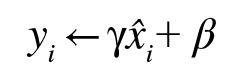

In [8]:
Image("./deep_learning_images/e 6.8.png", width=200, height=50)

$\gamma$가 확대를 $\beta$가 이동을 담당한다. 두 값은 처음에는 $\gamma$ = 1, $\beta$ = 0에서 시작한다. 이 식을 계산 그래프로 나타내면 다음과 같다.

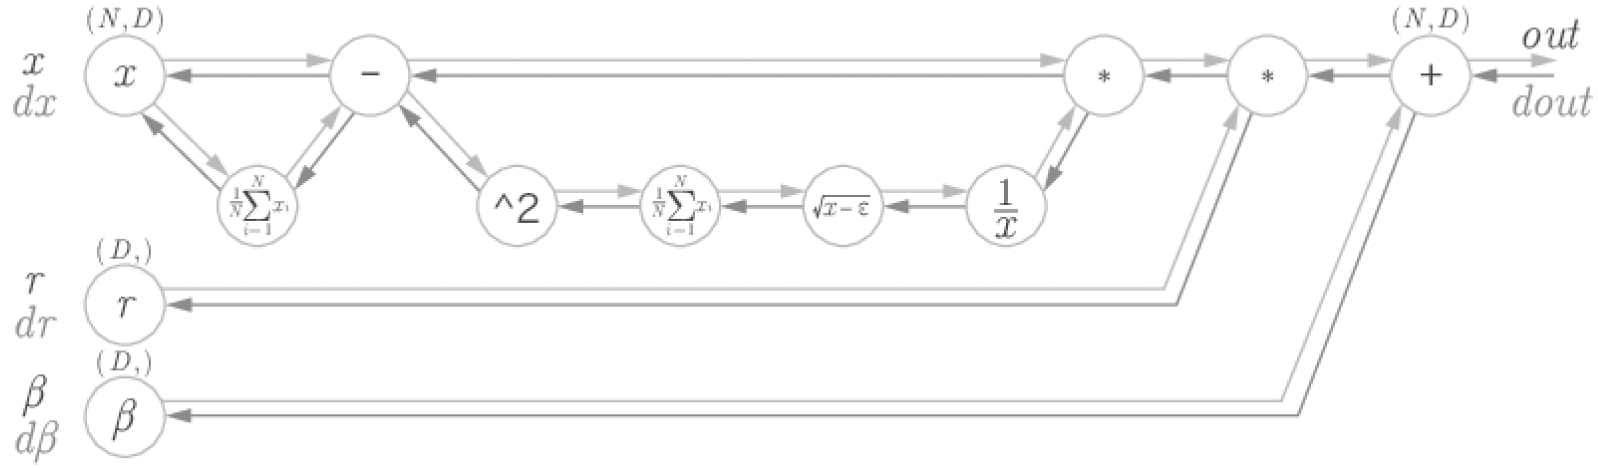

In [13]:
Image("./deep_learning_images/fig 6-17.png", width=600, height=600)

### 6.3.2 배치 정규화의 효과

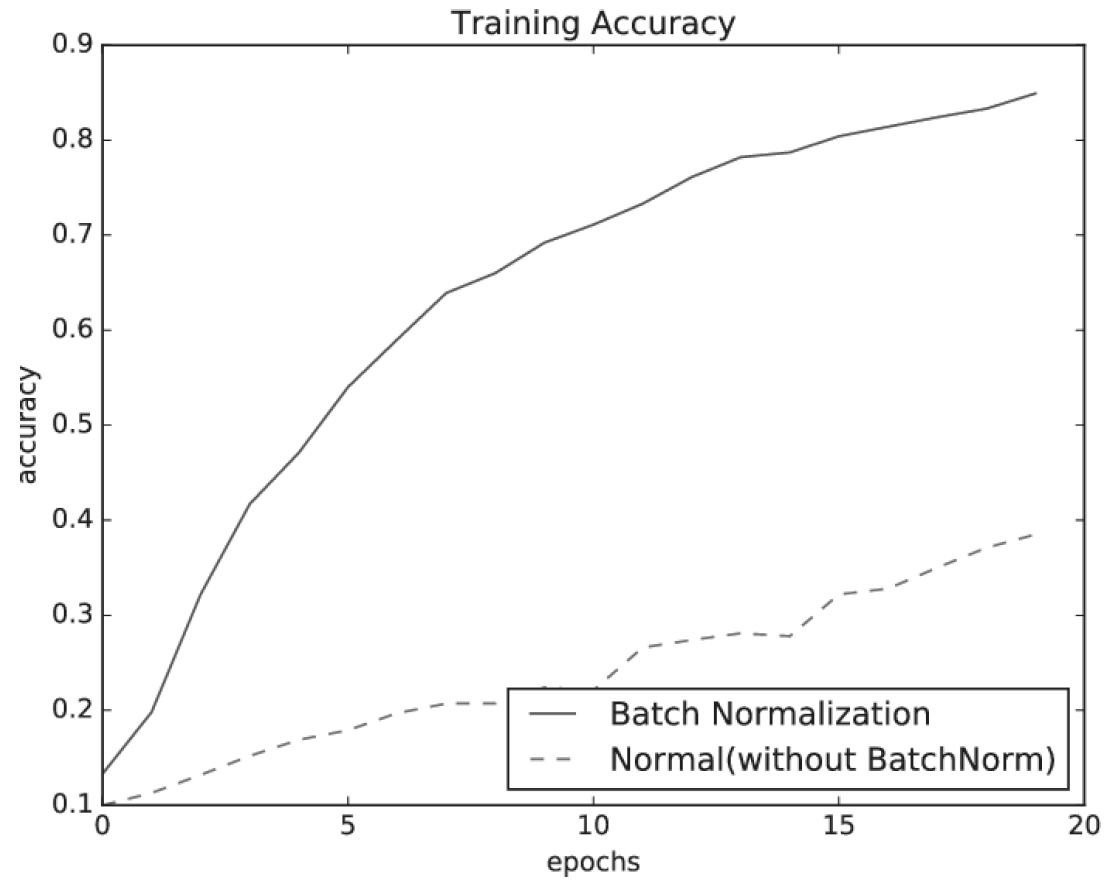

In [15]:
Image("./deep_learning_images/fig 6-18.png", width=400, height=400)

배치 정규화가 학습을 빨리 진전시키고 있다.

가중치 값의 표준편차를 다양하게 바꿔본 결과를 살펴보자

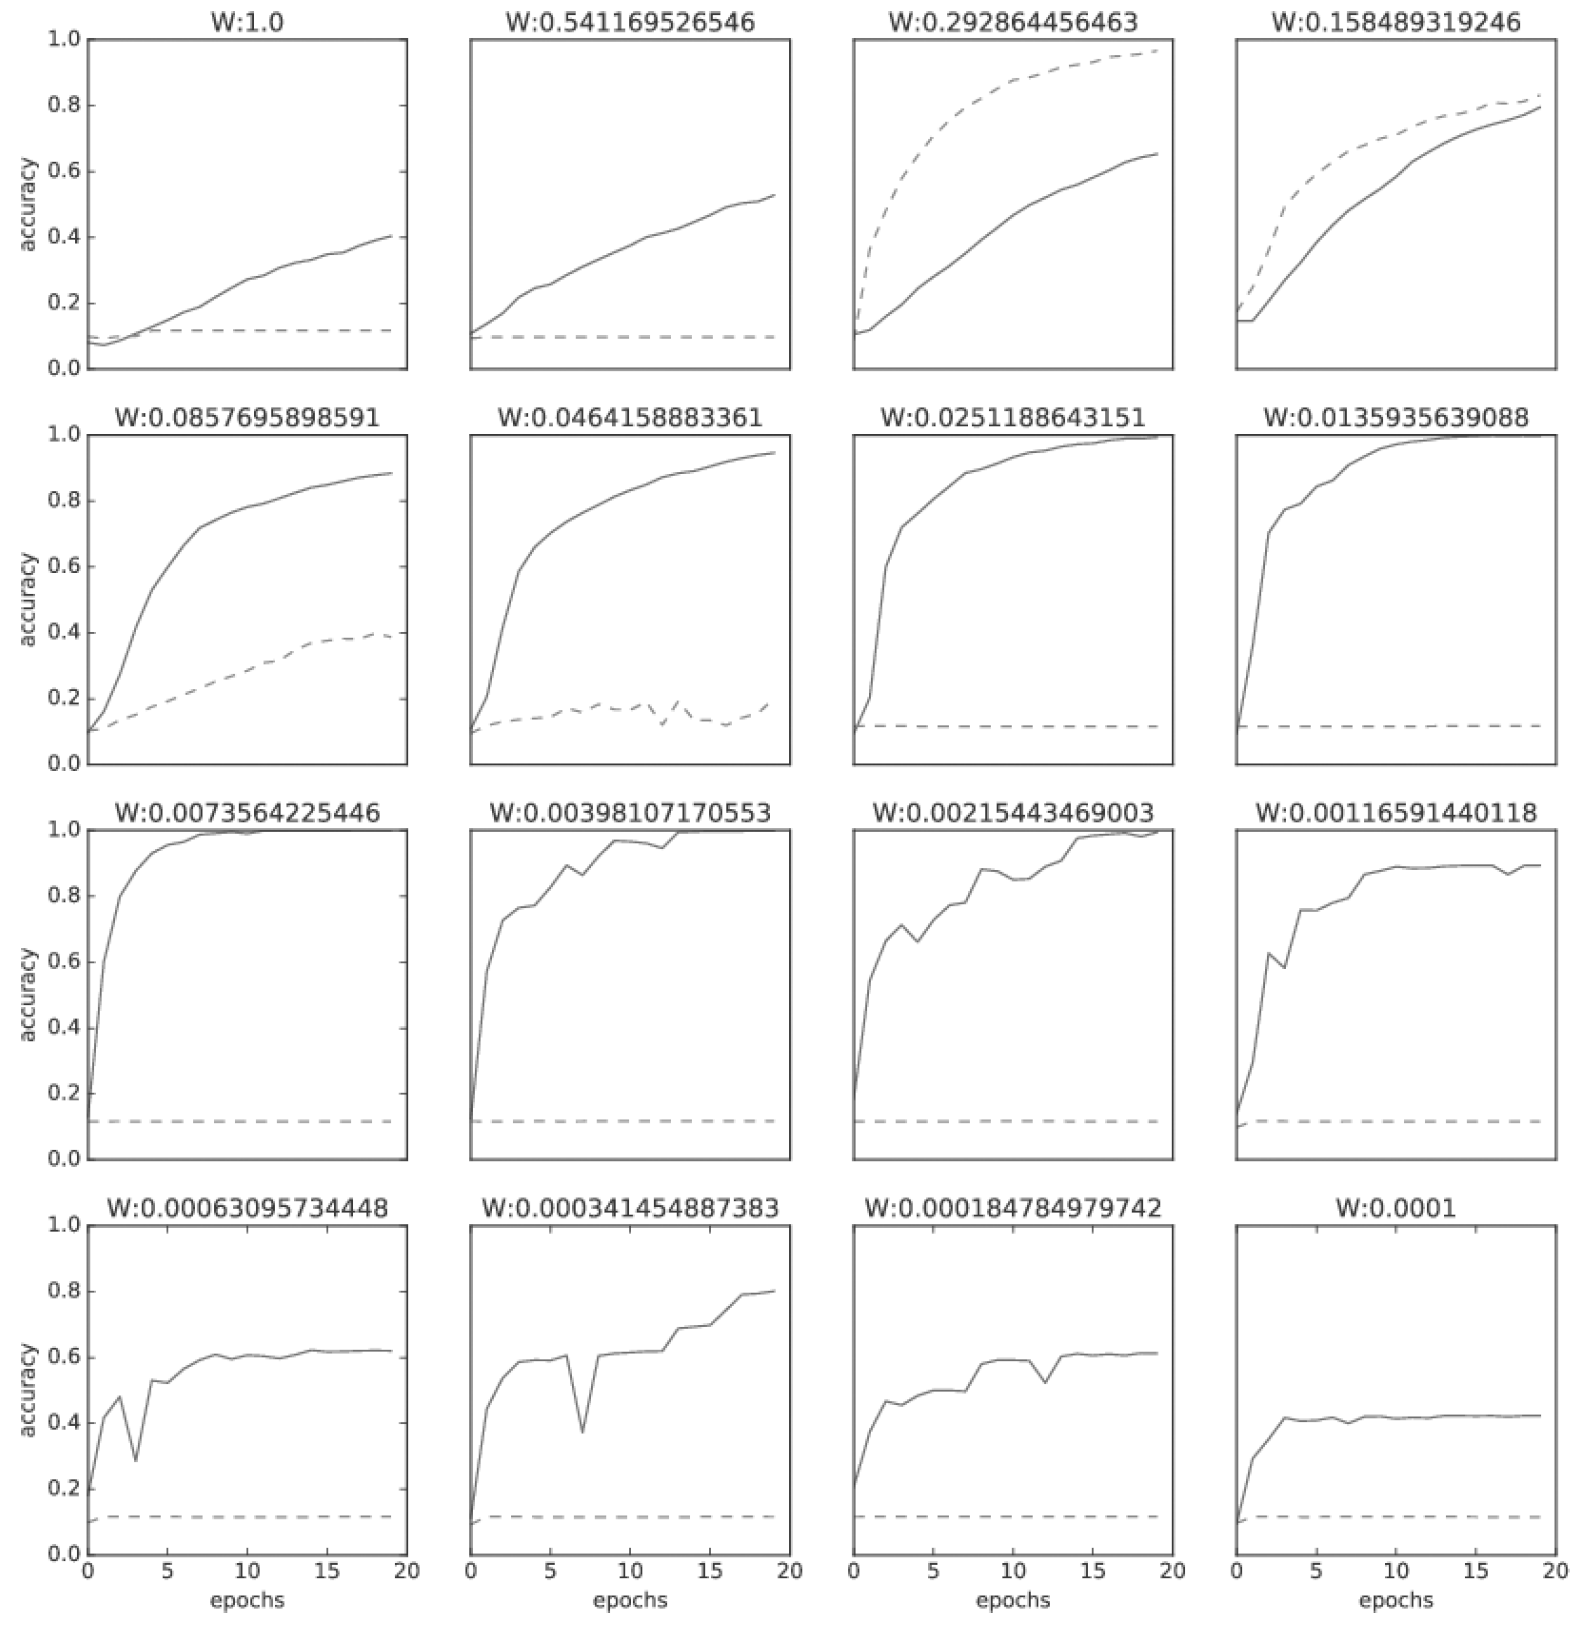

In [19]:
Image("./deep_learning_images/fig 6-19.png", width=700, height=700)

거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠르다.

## 6.4 바른 학습을 위해

### 6.4.1 오버피팅

- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

주로 이런 경우에 오버피팅이 일어난다.

### 6.4.2 가중치 감소

가중치 감소는 모든 가중치 각각의 손실 함수에 $\frac{1}{2} \lambda W^{2}$을 더한다. 따라서 가중치 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정규화 항을 미분한 $\lambda W$를 더한다

### 6.4.3 드롭아웃

신경망 모델이 복잡해지면 가중치 감소만으로 오버피팅을 막기 힘들어진다. 이럴 때는 **드롭아웃**(dropout)기법을 이용하면 된다.

드랍아웃은 뉴런을 임의로 삭제하면서 학습하는 방법이다. 훈련때 은닉충의 뉴런을 무작위로 골라 삭제한다. 삭제된 뉴런은 아래와 같이 신호를 전달하지 않게 된다. 

훈련시에는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달한다. 단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱해서 출력한다.

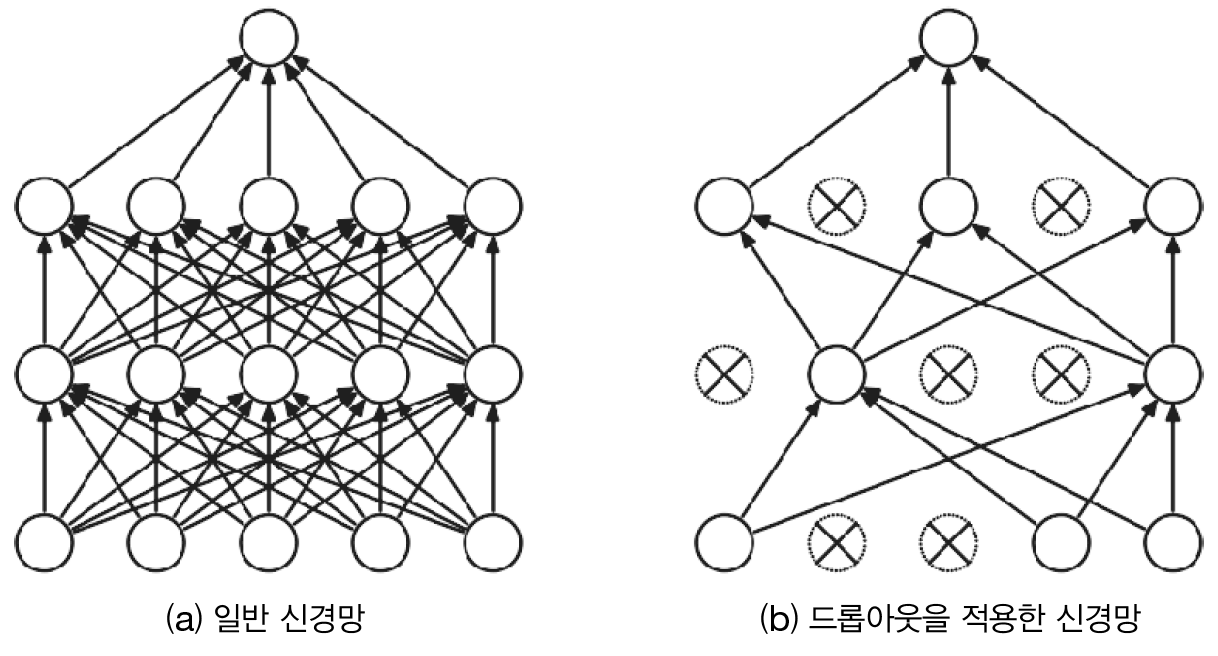

In [22]:
Image("./deep_learning_images/fig 6-22.png", width=350, height=350)

In [24]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

핵심은 훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것이다. self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio 보다 큰 원소만 True로 설정한다.

역전파 때의 동작은 ReLU와 같다. 순전파 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않는 뉴런은 역전파 때도 신호를 차단한다.

**NOTE** 기계학습에서는 **앙상블 학습**을 애용한다. 신경망의 맥락에서, 가령 같은(혹은 비슷한)구조의 네트워크를 5개 준비하여 따로따로 학습시키고, 시험 때는 그 5개의 출력을 평균 내어 답하는 것이다. 앙상블 학습을 수행하면 신경망의 정확도가 몇%정도 개선된다.

앙상블 학습은 드롭아웃과 밀접하다. 드롭아웃이 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문이다. 그리고 추론 때는 뉴런의 출력에 삭제한 비율(예를 들어 0.5)를 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻는다. 즉 드롭아웃은 앙상블 학습과 같은 효과를 대략 하나의 네트워크로 구현했다고 생각할 수 있다.

## 6.5 적절한 하이퍼파라미터 값 찾기

신경망에서의 하이퍼파라미터는 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등을 뜻한다.

### 6.5.1 검증 데이터

하이퍼파라미터 조정용 데이터를 일반적으로 **검증 데이터**(validation data) 라고 부른다. 하이퍼파라미터의 적절성을 평가하는 데이터인 셈이다.

훈련 데이터는 매개변수(가중치와 편향)의 학습에 이용하고, 검증 데이터는 하이퍼파라미터의 성능을 평가하는데 이용한다. 시험 데이터는 범용 성능을 확인하기 위해서 마지막으로 이용한다.(이상적으로는 한번)

- 훈련 데이터 : 매개변수 학습
- 검증 데이터 : 하이퍼파라미터 성능 평가
- 시험 데이터 : 신경망의 범용 성능 평가

### 6.5.2 하이퍼파라미터 최적화

**NOTE** 신경망의 하이퍼파라미터 최적화에서는 그리드 서치 같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 편이 좋은 결과를 낸다고 알려져 있다.

하이퍼파라미터의 범위는 '대략적'으로 지정하는 것이 효과적이다. 10의 거듭제곱 단위로 범위를 지정하는데 이를 '로그 스케일로 지정한다'고 한다. 딥러닝 학습에는 시간이 오래 걸리기 때문에 나쁠듯한 값은 일찍 포기하는것이 낫다. 그래서 학습을 위한 에폭을 잡게 하여 1회 평가에 걸리는 시간을 단축하는 것이 효과적이다.

- 0단계 : 하이퍼파라미터 값의 범위를 설정한다.
- 1단계 : 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.
- 2단계 : 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다.(단 에폭은 작게 설정한다.)
- 3단계 : 1단계와 2단계를 특정 횟수(100회 등) 반복하여, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

이상을 반복하여 하이퍼파라미터의 범위를 좁혀가고, 어느 정도 좁혀지면 그 압축한 범위에서 값을 하나 골라낸다.

더욱 세련된 방법을 찾는다면 **베이즈 최적화**를 생각해 볼 수 있다.

## 6.6 정리

- 매개변수 갱신 방법에는 확률적 경사 하강볍(SGD)외에도 모멘텀, AdaGrad, Adam 등이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다.
- 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값의 영향을 덜 받는다.
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.